# Plotting Sigmoid Function

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.colors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

$$S_{w,b}(x) = \frac{1}{1 + e^{-(w x + b)}}$$

In [3]:
def sigmoid(x, w, b):
  return 1 / (1 + np.exp(-(w * x + b)))


In [4]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [5]:
w = 0.9
b = 0.1
X = np.linspace(-10, 10, 100)
Y = sigmoid(X, w, b)

In [6]:
type(Y)

numpy.ndarray

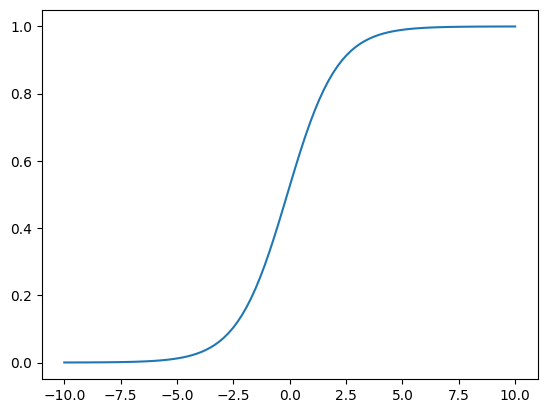

In [7]:
plt.plot(X, Y)
plt.show()

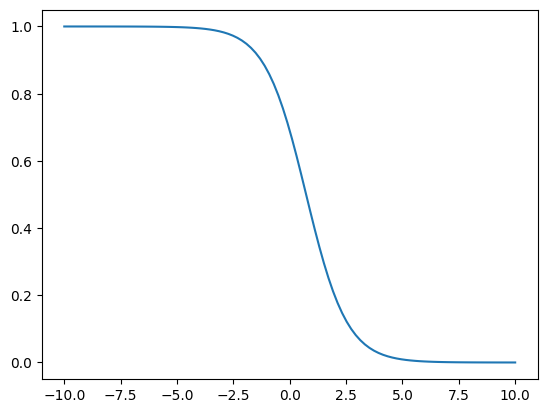

In [8]:
w = -1.1    # @param {type:"slider", min:-2, max:2, step:0.1}
b = 0.8      # @param {type:"slider", min:-2, max:2, step:0.1}
X = np.linspace(-10, 10, 100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

## Sigmoid function for 2 variables

$$S_{w_1,w_2}(x_1, x_2) = \frac{1}{1 + e^{-(w_1 x_1 + w_2 x_2 + b)}} $$

In [9]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1 / (1 + np.exp(-(w1 * x1 + w2 * x2 + b)))

In [10]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [11]:
from mpl_toolkits import mplot3d

In [12]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 80)

XX1, XX2 = np.meshgrid(X1, X2)

print(XX1.shape, XX2.shape, X1.shape, X2.shape)

(80, 100) (80, 100) (100,) (80,)


In [13]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [14]:
mycmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

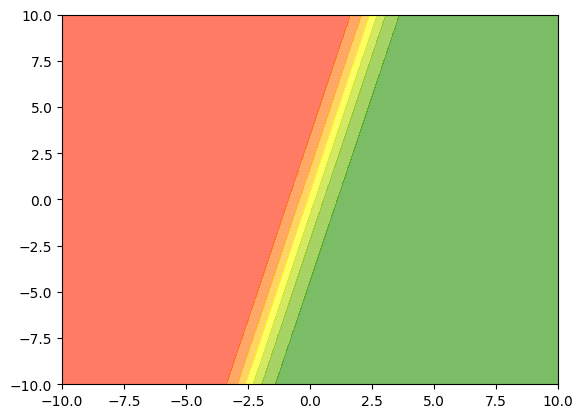

In [15]:
plt.contourf(XX1, XX2, Y,cmap = mycmap, alpha = 0.6)
plt.show()

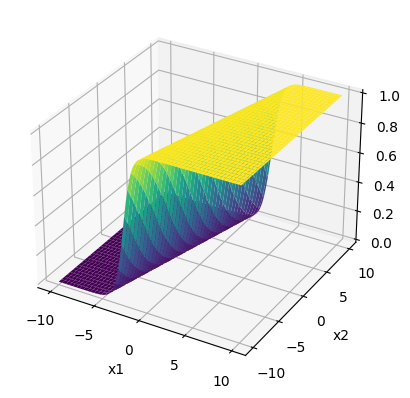

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

plt.show()




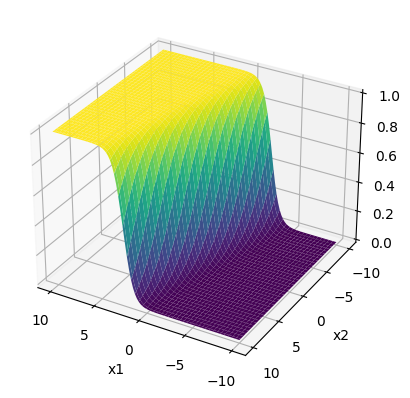

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

ax.view_init(30, 120)
plt.show()


# Standardization and nordisation

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
R = np.random.random([100, 1])

In [20]:
R


array([[0.65101955],
       [0.5272715 ],
       [0.86997586],
       [0.75966755],
       [0.6013771 ],
       [0.8768839 ],
       [0.22371805],
       [0.03854678],
       [0.94566485],
       [0.13077184],
       [0.92974533],
       [0.76315457],
       [0.90352771],
       [0.94399856],
       [0.62352725],
       [0.34938625],
       [0.24623423],
       [0.23759682],
       [0.11048948],
       [0.40178884],
       [0.8204536 ],
       [0.27458608],
       [0.59236016],
       [0.37133053],
       [0.3937653 ],
       [0.06382251],
       [0.59929517],
       [0.14473601],
       [0.7946911 ],
       [0.71809792],
       [0.45784963],
       [0.84676545],
       [0.4858172 ],
       [0.92442319],
       [0.65346112],
       [0.93113452],
       [0.08946261],
       [0.0657868 ],
       [0.98259809],
       [0.85194525],
       [0.15352845],
       [0.59878685],
       [0.07476854],
       [0.67729448],
       [0.60891159],
       [0.56941198],
       [0.78249531],
       [0.933

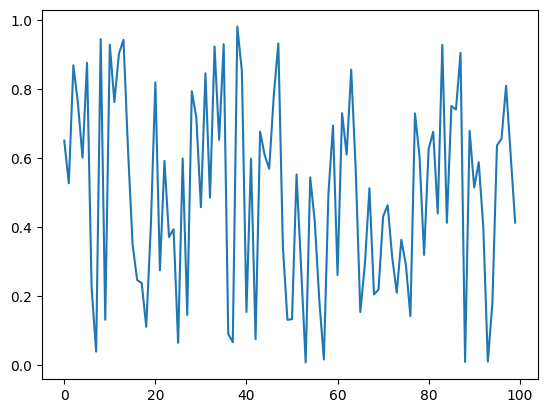

In [21]:
plt.plot(R)
plt.show()

In [22]:
np.mean(R)

0.49660079661706

In [23]:
np.std(R)

0.2782910456302445

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(R)

StandardScaler()

In [26]:
scaler.mean_

array([0.4966008])

In [27]:
RT= scaler.transform(R)

In [28]:
np.mean(RT)

-4.107825191113079e-17

In [29]:
np.std(RT)

0.9999999999999998

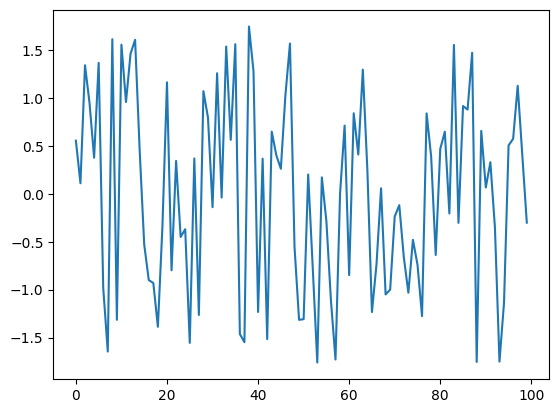

In [30]:
plt.plot(RT)
plt.show()

# Compute Loss for a given dataset

In [31]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25)*20 - 10
Y = sigmoid(X, w_unknown, b_unknown)


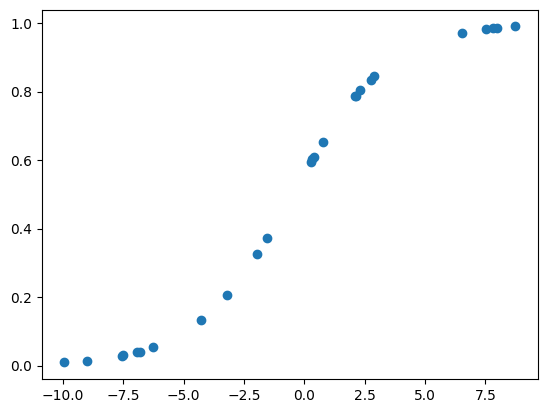

In [32]:
plt.scatter(X, Y)
plt.show()

In [33]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [34]:
W = np.linspace(0, 1, 100)
B = np.linspace(0, 1, 100)

WW, BB = np.meshgrid(W, B)
Loss = np.zeros(WW.shape)

In [35]:
WW.shape

(100, 100)

In [36]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

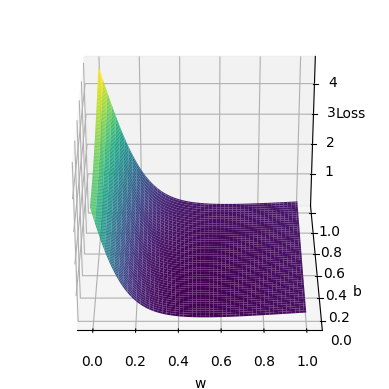

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');

ax.view_init(30, 270)
plt.show()

# Class for sigmoid neuron

In [40]:
class SigmoidNeuron:

  def __init__ (self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    error = y_pred - y
    return 2 * error * y_pred * (1 - y_pred) * x

  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    error = y_pred - y
    return 2 * error * y_pred * (1 - y_pred)

  def fit(self,X,Y,epochs = 1, learning_rate = 1, initialise = True, display_loss = False):

    #init param
    self.w = np.random.randn(1, X.shape[1])
    self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w_mse(x, y)
        db += self.grad_b_mse(x, y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db





# Fit for toy dataset

In [45]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [2, 4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]


In [46]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [53]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=mycmap, alpha=0.5)
  ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=mycmap, alpha=1 )

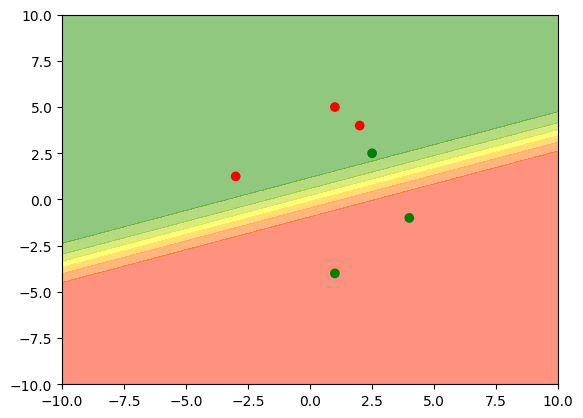

In [54]:
plot_sn(X, Y, sn, plt)

[[1.33671249 0.8005928 ]] [0.02926208]


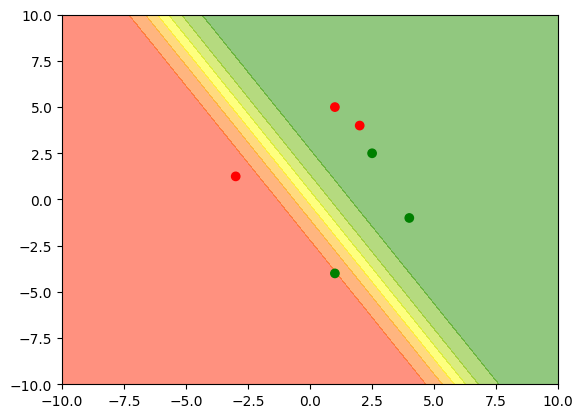

[[0.59655488 0.56828651]] [-0.00124831]


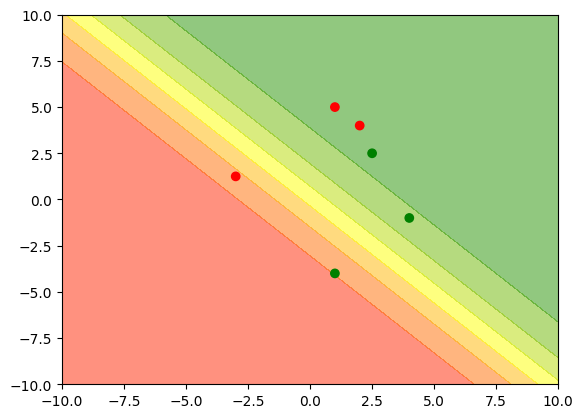

[[ 0.82413818 -0.40785438]] [0.13152383]


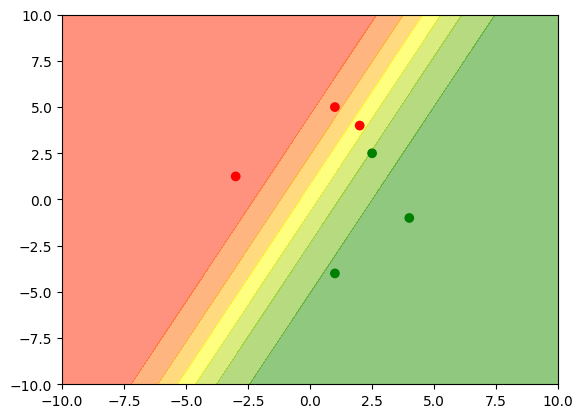

[[ 2.03335896 -0.38392133]] [-0.06314926]


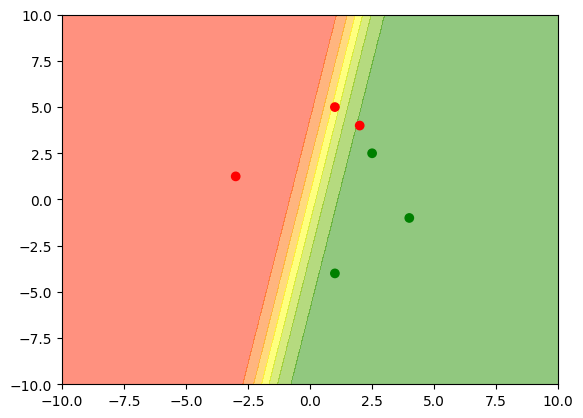

[[ 1.03730175 -0.69403743]] [0.14196286]


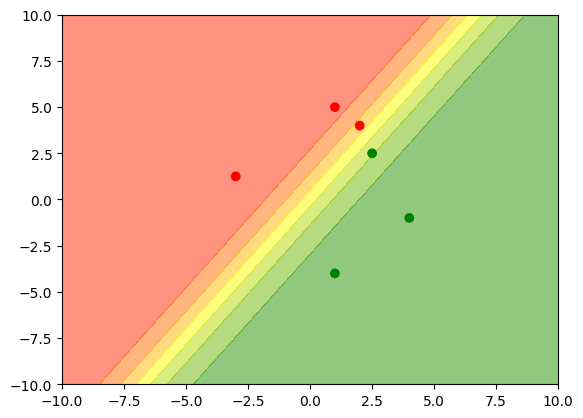

[[ 0.78787044 -1.52980989]] [-0.03589734]


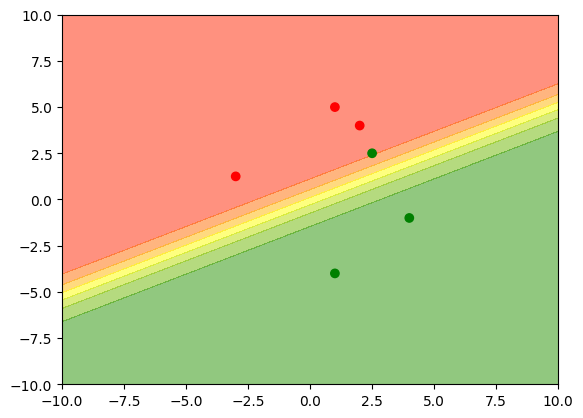

[[ 0.72978487 -0.96259212]] [0.05993686]


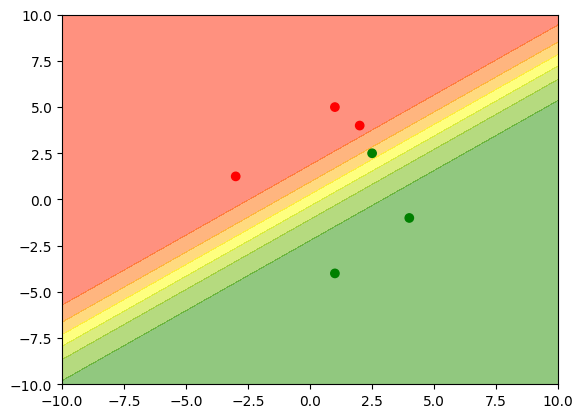

[[0.26968526 1.62561456]] [0.01299066]


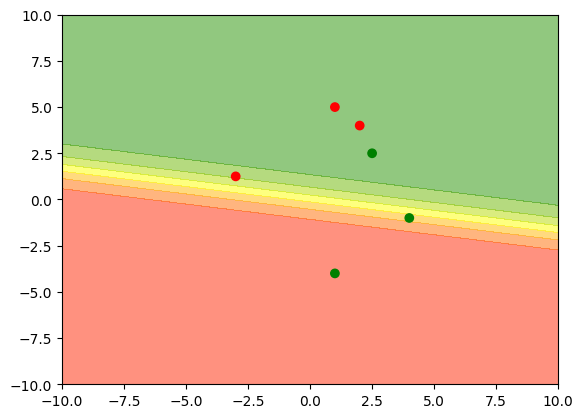

[[ 0.81306607 -1.39330408]] [-0.23505781]


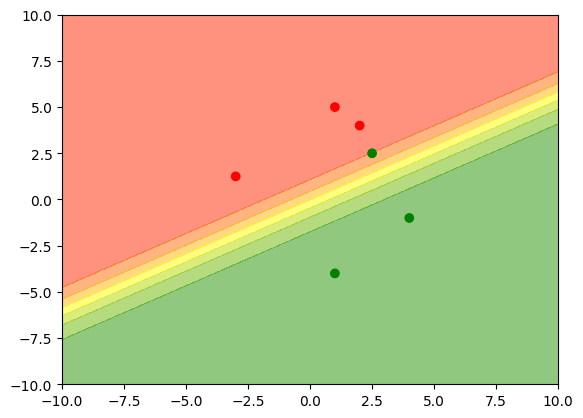

[[-0.50300259  0.77396717]] [-0.0031837]


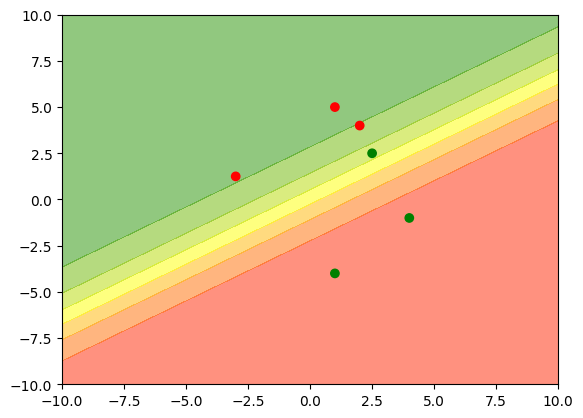

[[ 0.8891905  -1.79900937]] [-0.0567776]


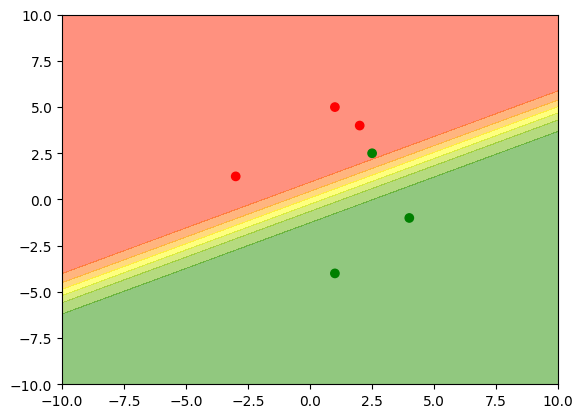

[[1.6431208  2.70474948]] [-0.0835455]


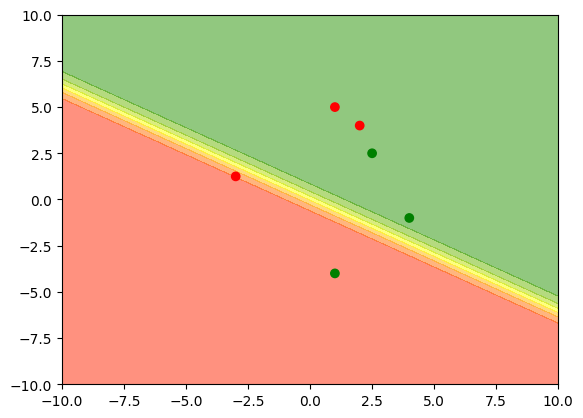

[[1.1788124  0.91635339]] [-0.0475018]


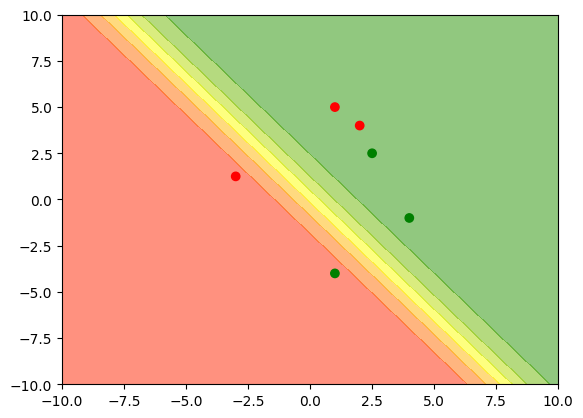

[[ 0.97962732 -0.53133236]] [0.06758502]


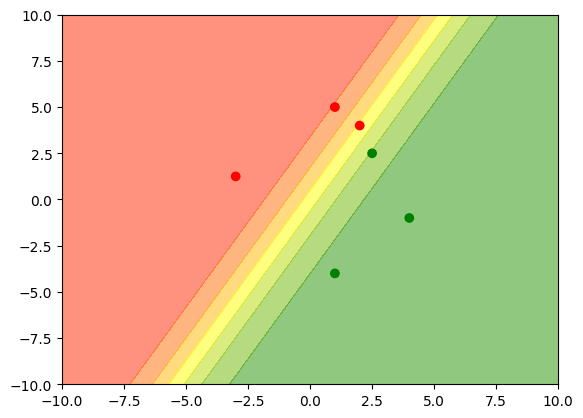

[[-2.04997146 -0.21730429]] [0.01061417]


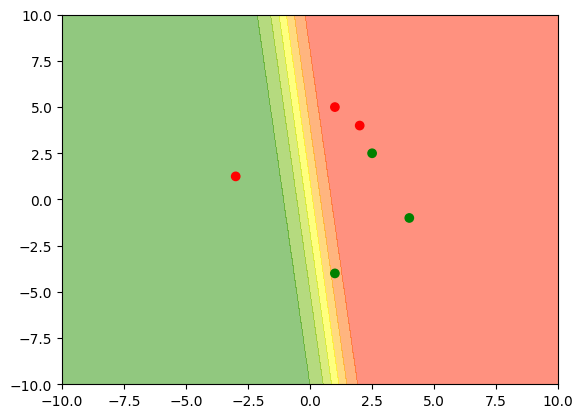

[[ 1.87746741 -0.16058695]] [0.10309546]


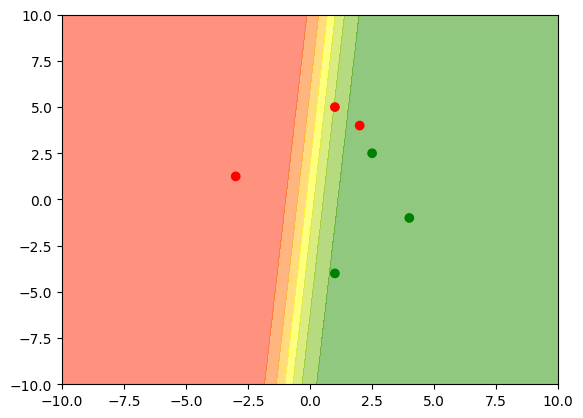

[[1.26717525 1.17736114]] [-0.05338126]


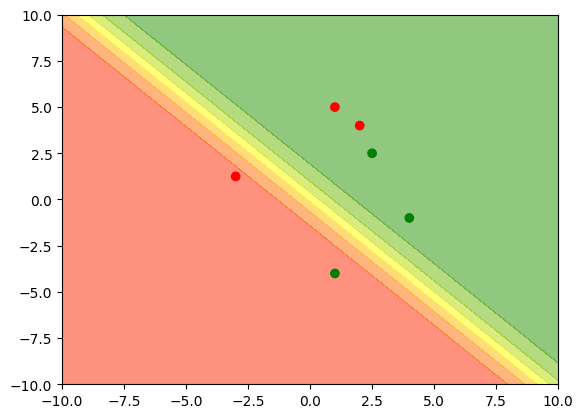

[[1.89438852 0.49302322]] [0.0988955]


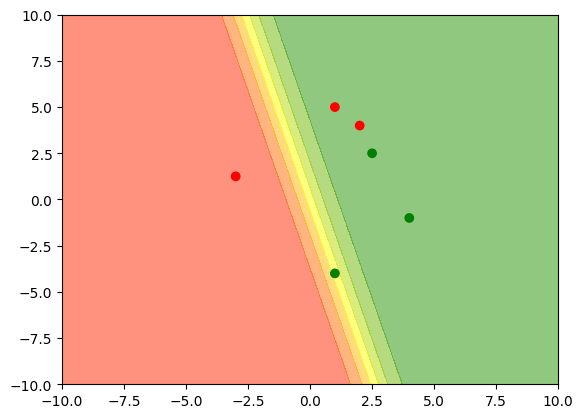

[[ 0.45839406 -1.6190626 ]] [-0.13527576]


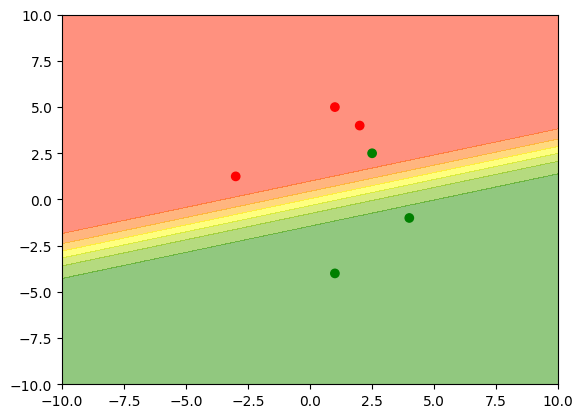

[[ 1.31919219 -1.3415614 ]] [-0.16960695]


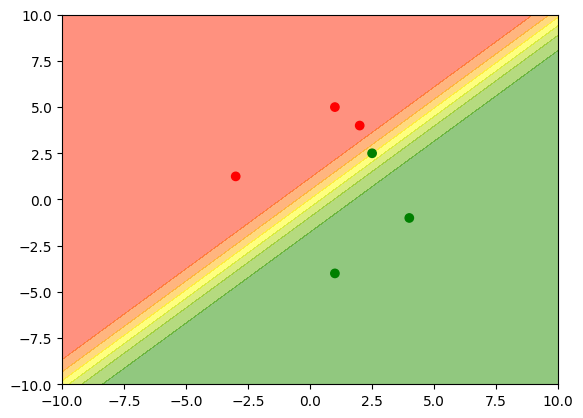

[[0.04208707 1.92353537]] [0.0088985]


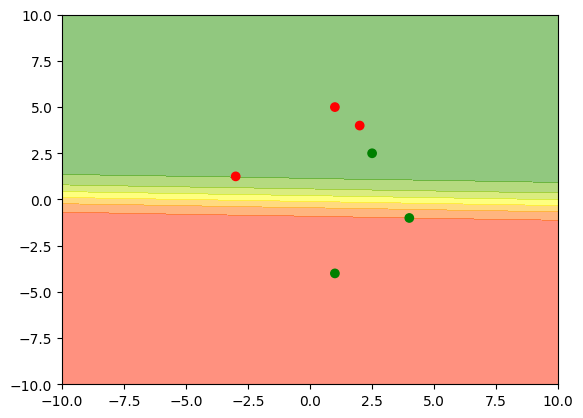

[[-0.15582267 -1.49592536]] [-0.06063406]


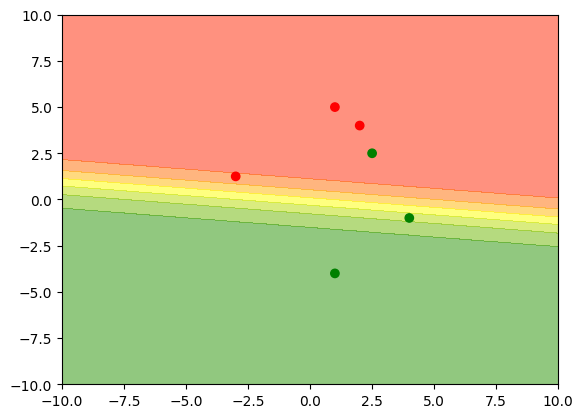

[[-0.11778754  1.39016594]] [-0.00191871]


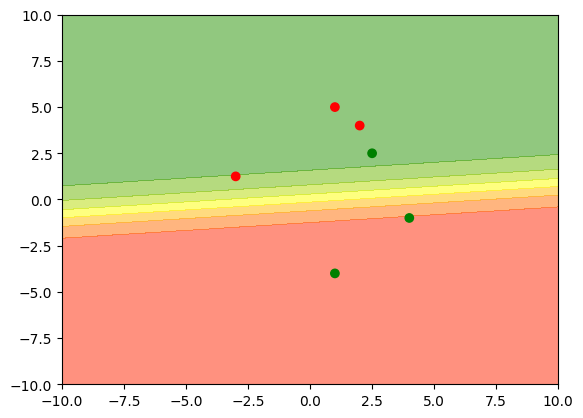

[[ 1.58389751 -0.20676394]] [0.12134467]


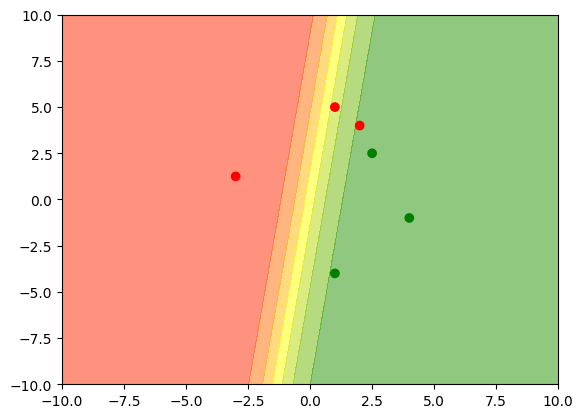

[[ 1.37481437 -1.27840266]] [-0.21323837]


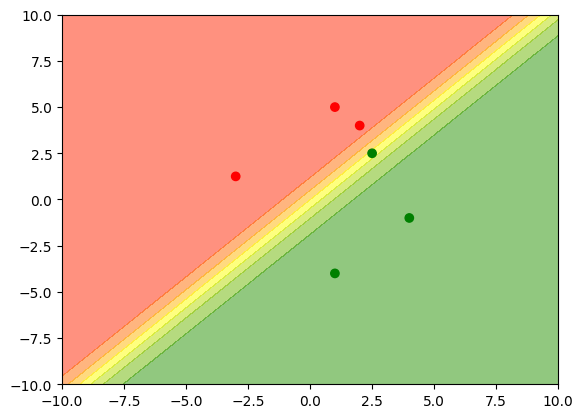

In [55]:
sn.fit(X, Y, 1, 0.25, True)
for i in range(25):
  print(sn.w, sn.b)
  plot_sn(X, Y, sn, plt)
  plt.show()
  sn.fit(X, Y, 1, 0.5, False)